# k-Nearest Neighbors (kNN)

Install mglearn

In [ ]:
!pip install mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.0 MB/s eta 0:00:00


Contoh Analisis Performa kNN

Untuk mengetahui performa dari model kNN, kita dapat melakukan analisis terhadap dua hal, pertama adalah decision boundaries, kedua performa berdasarkan metric klasifikasi untuk setiap nilai . Untuk decision boundaries, cara ini dapat dilakukan dengan amatan visual jika fitur yang dibandingkan tidak lebih dari 3. Decision boundaries akan lebih "halus" jika jumlah tetangga yang digunakan semakin banyak. Akan tetapi, perhatikan jumlah fitur / kompleksitas dari data yang digunakan.

- Gunakan beberapa (sedikit) tetangga pada model yang kompleks

- Gunakan banyak tetangga pada model yang sederhana

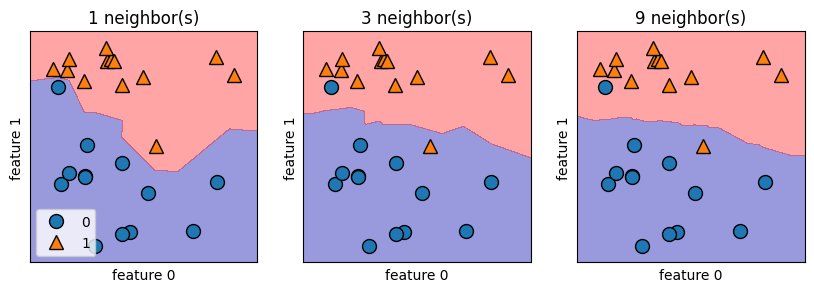

In [ ]:
# Decision Boundaries - Introduction to Machine Learning
# Andreas C. Müller, Sarah Guido (2023)
# pip install mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn


X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
  axes[0].legend(loc=3)

Dapat dilihat pada gambar sebelah kiri, penggunaan 1 tetangga akan menjadikan decision boundary akan mengikuti pola data dengan "kaku". Jumlah tetangga yang lebih banyak akan menjadikan batas keputusan menjadi lebih halus. Namun apakah dengan cara ini performa dapat lebih baik?

Kita perlu melakukan analisis lebih lanjut untuk siap jumlah tetangga yang digunakan.

Contoh:

Dari hasil grafik dapat dilihat bahwa, jika tetangga yang digunakan hanya 1, performa data training akan sangat baik akan tetapi bertolak belakang dengan data testing. Hal ini menunjukkan fenomena overfitting dimana model tidak dapat mengeneralisasi data dengan cukup baik. Akan tetapi jika 10 tetangga digunakan, maka kompleksitas model akan menjadi lebih sederhana sehingga performa (akurasi) malah menurun. Dari grafik kita dapat mengetahui bahwa jumlah tetangga yang dapat mengakomodasi performa dengan cukup baik dari sisi training dan testing adalah 6 tetangga dilihat dari grafik performa training dan testing yang hampir berdekatan.

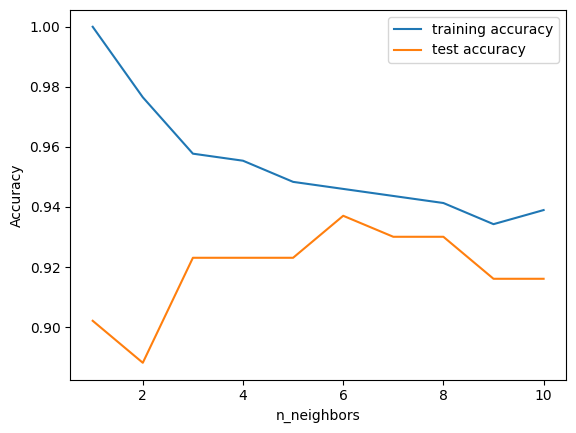

In [ ]:
# Introduction to Machine Learning
# Andreas C. Müller, Sarah Guido (2023)
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Tugas 1


1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

    Jawab:

    Saya menggunakan 10 fitur yaitu meanfreq, sd, median, Q25, Q75, IQR, skew, centroid, meanfun, dan meanfin. Dimana fitur tersebut berhubungan dengan karakteristik frekuensi dan intensitas suara, yang secara signifikan membedakan suara laki-laki (frekuensi rendah) dan perempuan (frekuensi tinggi).




3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

    Jawab:
    nilau yang terbaik adalah k = 7, dimana nilai ini memberikan akurasi tertinggi pada data uji sebesar ±97%.

Persiapan dan Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()


# Load data
import pandas as pd
data = pd.read_csv('voice.csv')
data.head()

Saving voice.csv to voice.csv


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Jumlah baris dan kolom: (3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label 

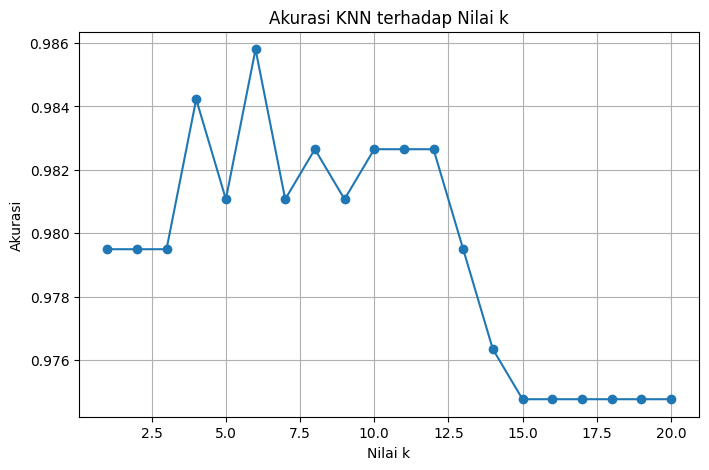

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv("voice.csv")
print("Jumlah baris dan kolom:", df.shape)
print(df.head())

# Encoding Label (Male/Female)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # male=1, female=0


# Pisahkan Fitur dan Label
X = df.drop('label', axis=1)
y = df['label']

# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Seleksi Fitur (menggunakan ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)  # coba pilih 10 fitur terbaik
X_new = selector.fit_transform(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("\n🔹 10 Fitur terbaik berdasarkan ANOVA F-test:")
print(selected_features)

# Grid Search untuk mencari nilai k terbaik
param_grid = {'n_neighbors': np.arange(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_new, y_train)

print("\n Nilai k terbaik:", grid.best_params_['n_neighbors'])
print("Akurasi terbaik di training set:", grid.best_score_)

# Evaluasi pada data test
best_k = grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_new, y_train)

X_test_new = selector.transform(X_test)
y_pred = knn.predict(X_test_new)

print("\n📈 Akurasi di data test:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualisasi Akurasi terhadap nilai k
accuracies = []
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_new, y_train)
    acc = knn_temp.score(X_test_new, y_test)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracies, marker='o')
plt.title("Akurasi KNN terhadap Nilai k")
plt.xlabel("Nilai k")
plt.ylabel("Akurasi")
plt.grid(True)
plt.show()
